# Comó se relacionan las marginales, la conjunta y las condicionales?

Cuando dos variables son dependientes, la probabilidad de la conjunta se calcula de la siguiente manera:
$\large P(X_1, X_2) = P(X_1 | X_2=x_2)P(X_2) = P(X_2 | X_1=x_1)P(X_1)$

Cuando hay independencia, la probabilidad condicional es: $\ P(X_1 | X_2) = P(X_1)$ y $\ P(X_2 | X_1) = P(X_2)$. Entonces, se comprueba que en estos casos (variables independientes), la conjunta resulta:

$\large P(X_1, X_2) = P(X_1)P(X_2) = P(X_2)P(X_1)$


In [15]:
import pandas as pd
from collections import Counter

df = pd.read_csv('alturas-pesos-train.csv')

In [16]:
tuplas = []
for line in df[['Peso', 'Altura']].values:
    tuplas.append(tuple(line))

In [17]:
frecuencia_conjunta = dict(Counter(tuplas))

In [18]:
print(frecuencia_conjunta)

{(60, 160): 453, (95, 180): 201, (75, 170): 394, (55, 160): 272, (55, 150): 59, (80, 175): 351, (70, 170): 279, (55, 155): 302, (85, 180): 239, (60, 165): 235, (80, 165): 98, (95, 185): 153, (75, 165): 209, (65, 170): 128, (65, 160): 305, (40, 150): 16, (40, 145): 22, (70, 160): 108, (65, 165): 402, (85, 170): 176, (85, 165): 23, (50, 155): 208, (90, 175): 262, (30, 145): 1, (45, 150): 93, (60, 155): 179, (90, 170): 36, (90, 180): 335, (110, 195): 11, (85, 185): 30, (65, 155): 55, (85, 175): 408, (70, 165): 337, (60, 170): 31, (60, 150): 16, (90, 190): 5, (100, 185): 97, (45, 155): 46, (50, 150): 133, (105, 185): 18, (80, 170): 369, (35, 145): 3, (95, 175): 58, (50, 160): 60, (75, 175): 134, (100, 190): 48, (75, 160): 42, (55, 165): 69, (95, 190): 38, (70, 175): 44, (55, 145): 4, (90, 185): 119, (105, 195): 13, (50, 145): 16, (100, 175): 9, (80, 180): 63, (100, 180): 33, (45, 145): 33, (110, 190): 8, (115, 200): 2, (45, 160): 6, (105, 190): 27, (65, 175): 8, (70, 155): 8, (40, 140): 4,

## Ejemplo

$\large P(Peso= 80, Altura =165) = P(Peso=80|Altura=165)P(Altura=165)$

### Izquierda del igual:
$P(Peso= 80, Altura =165)$

In [19]:
# Si lo obtenemos de la conjunta directamente
P_80_165 = frecuencia_conjunta[(80, 165)]/len(df)
print(P_80_165)

0.01225


### Derecha del igual $P(Peso=80|Altura=165)P(Altura=165)$

In [20]:
Cant_alt_165 = (df['Altura'] == 165).sum()
Cant_peso_80_alt_165 = (df[df['Altura'] == 165]['Peso'] == 80).sum()

In [21]:
# Primer parte del producto 
P_80_dado_165 = Cant_peso_80_alt_165/Cant_alt_165
print(P_80_dado_165)

0.07116920842411038


In [22]:
# Segunda parte del producto 
P_alt_165 = Cant_alt_165/len(df)
P_alt_165

0.172125

In [23]:
# Resultado del producto que coincide como es de esperar con el 
P_alt_165*P_80_dado_165

0.01225

# Notar como se hizo el cálculo

In [24]:
Cant_alt_165/len(df) * Cant_peso_80_alt_165/Cant_alt_165 == Cant_peso_80_alt_165/len(df)

True

Es decir, si tenemos acceso a todos los datos, la probabilidad condicional podemos calcularla como la proporción el total de casos que cumplen la condición respecto del total.

# Independencia

$P(X_1, X_2) = P(X_1 | X_2=x_2)P(X_2)$

Si $X_1$ no depende de $X_2$ $P(X_1 | X_2=x_2)$ = $P(X_1)$

$\large P(X_1, X_2) = P(X_1)P(X_2)$

# De conjunta a marginal

$\large P(X_1) = \sum_{x_2}{P(X_1, X_2)}$

$\large P(Pesos) = \sum_{Alturas}{P(Pesos, Alturas)}$

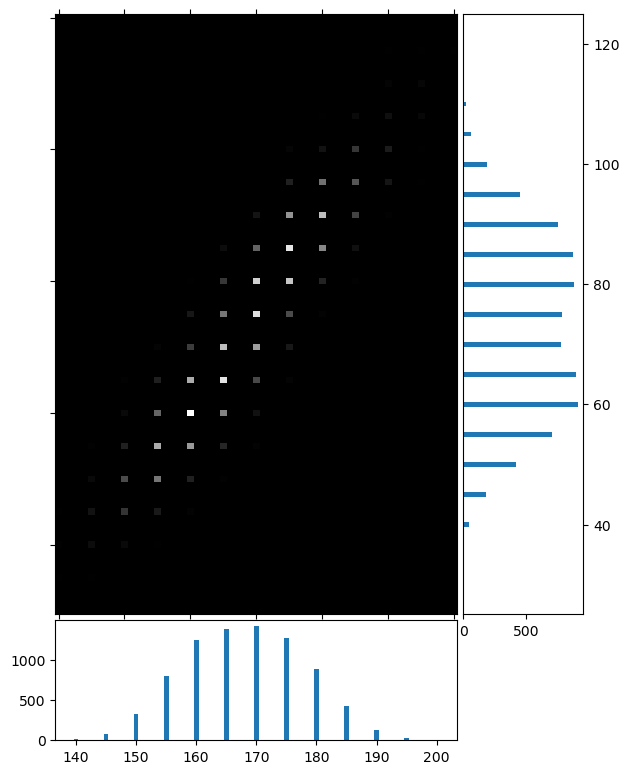

In [25]:
from helper import plot_joint_hists_dicts
_ = plot_joint_hists_dicts(frecuencia_conjunta)

# Probabilidad Total
$\large P(X_1) = \sum_{x_2}{P(X_1| X_2)P(X_2)}$

$\large P(Pesos = p) = P(Pesos = p| Mujer)P(Mujer) + P(Pesos| Hombre)P(Hombre)$

A $𝑃(𝑋1|𝑋2)$ se lo llama likelihood

In [26]:
# 𝑃(𝑃𝑒𝑠𝑜𝑠=𝑝)
(df['Peso'] == 65).sum()/len(df)

0.112875

In [27]:
# 𝑃(𝑃𝑒𝑠𝑜𝑠=𝑝|𝑀𝑢𝑗𝑒𝑟)𝑃(𝑀𝑢𝑗𝑒𝑟)+𝑃(𝑃𝑒𝑠𝑜𝑠|𝐻𝑜𝑚𝑏𝑟𝑒)𝑃(𝐻𝑜𝑚𝑏𝑟𝑒)
((df['Peso'] == 65) & (df['Genero'] == 'Mujer')).sum()/(df['Genero']=='Mujer').sum() * (df['Genero']=='Mujer').sum()/len(df) + \
((df['Peso'] == 65) & (df['Genero'] == 'Hombre')).sum()/(df['Genero']=='Hombre').sum() * (df['Genero']=='Hombre').sum()/len(df)

0.11287499999999999

# Vector de medias

$E\{[X_1, ..., X_n]\} = [\mu_{x_1}, ..., \mu_{x_n}]$

In [28]:
df['Altura'].mean(), df['Peso'].mean()

(168.10875, 72.814375)

# Covarianza de 2 Variables aleatorias

$cov(X_1, X_2) = E[(X_1 - \mu_{x_1})((X_2 - \mu_{x_2})] = E\{X_1X_2\} - \mu_{X_1}\mu_{X_2}$

Que pasa si $X_1$ es igual a $X_2$ :

$cov(X_1, X_2) = \sigma_{x_1}^2 = \sigma_{x_2}^2$

$cov(X_1, X_2) = \sum_{(x_1, x_2) \in S} P(X_1=x_1, X_2=x_2)(x_1-\mu_{x_1})(x_2- \mu_{x_2})$

$\ cov = 0$ **NO** implica que no haya correlación entre las variables. Únicamente me está diciendo que no hay correlación **lineal**

Cual es minimo positivo?

In [29]:
conjunta_prob = {al:c/len(df) for al, c in frecuencia_conjunta.items()}
mu_alturas = df['Altura'].mean()
mu_pesos = df['Peso'].mean()
print(mu_alturas, mu_pesos)

168.10875 72.814375


In [30]:
cov = 0
for (pe, al), p in conjunta_prob.items():
    cov = cov + p * (pe-mu_pesos) * (al-mu_alturas)
print(cov)

133.01956171875


### Es alta o baja?

No puedo saberlo ya que la covarianza no tiene el mismo orden de magnitud (o unidades) que la variable. Debería normalizarlo para poder saber si es alto o bajo. Esa normalización es el coeficiente de correlación.

## Coeficiente de correlación
Mide la relación **lineal** entre dos V.As

### Si normalizo obtengo el coeficiente de correlación

$\large \rho(X_1, X_2) = \frac{cov(X_1, X_2)}{\sigma_{X_1} \sigma_{X_2}}$

In [16]:
std_alturas = df['Altura'].std()
std_pesos = df['Peso'].std()
corr_cof = cov/(std_alturas*std_pesos)

In [17]:
corr_cof

0.9105196990184911

Muy alta!

## Diferencia de correlación con entropía cruzada o divergencia KL?

- La entropía cruzada trabaja sobre el mismo espacio muestral mientras que la correlación no

# Matriz de covarianza en vectores aleatorios

$\vec{X} = [X_1, X_2, X_3, ..., X_N]$

$\Sigma_{\vec{X}} = 
\begin{bmatrix}
    cov(x_1,x_1) & cov(x_1,x_2) & cov(x_1,x_3) & \dots  & cov(x_1,x_N) \\
    cov(x_2,x_1) & cov(x_2,x_2) & cov(x_2,x_3) & \dots  & cov(x_2,x_N) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    cov(x_N,x_1) & cov(x_N,x_2) & cov(x_N,x_3) & \dots  & cov(x_N,x_N)
\end{bmatrix}$

$\Sigma_{\vec{X}} = 
\begin{bmatrix}
    \sigma_{x_1}^2 & cov(x_1,x_2) & cov(x_1,x_3) & \dots  & cov(x_1,x_N) \\
    cov(x_2,x_1) & \sigma_{x_2}^2 & cov(x_2,x_3) & \dots  & cov(x_2,x_N) \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    cov(x_N,x_1) & cov(x_N,x_2) & cov(x_N,x_3) & \dots  & \sigma_{x_N}^2
\end{bmatrix}$

En la mayoría de los casos, donde las variables son reales, la matriz de covarianza es simétrica.

# Que pasa cuando todas las V.A son independientes?

$\Sigma_{\vec{X}} = 
\begin{bmatrix}
    \sigma_{x_1}^2 & 0 & 0 & \dots  & 0 \\
    0 & \sigma_{x_2}^2 & 0 & \dots  & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & \sigma_{x_N}^2
\end{bmatrix}$

# Matriz de correlación

$\Sigma_{\vec{X}} = 
\begin{bmatrix}
    1 & \rho_{x_1,x_2} & \rho_{x_1,x_3} & \dots  & \rho_{x_1,x_N} \\
    \rho_{x_2,x_1} & 1 & \rho_{x_2,x_3} & \dots  & \rho_{x_2,x_N} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    cov{x_N,x_1} & \rho_{x_N,x_2} & \rho_{x_N,x_3} & \dots  & 1
\end{bmatrix}$

Puedo definir una distribución de probabilidad mediante el **vector de medias** y la **matriz de correlación** o la **matriz de covarianza**
Una distribución normal de probabilidad multivariable, queda 100% definida mediante estos parámetros, ya que una distribución normal se define exclusivamtne por la media y la desviación estándar: $\ N(\mu, \sigma)$

In [18]:
df.corr()

,Peso,Altura
Peso,1.000000,0.910634
Altura,0.910634,1.000000


In [20]:
df2 = df.copy()

In [21]:
import numpy as np
df2['Genero'] = df['Genero'] == 'Hombre'
# Cambiar Hombre por Mujer y ver que pasa

In [22]:
df2.corr()

,Genero,Peso,Altura
Genero,1.000000,0.793309,0.684495
Peso,0.793309,1.000000,0.910634
Altura,0.684495,0.910634,1.000000


# En numpy

In [23]:
df2

,Genero,Peso,Altura
0,False,60,160
1,True,95,180
2,True,75,170
3,False,55,160
4,False,55,150
5,False,60,160
6,True,80,175
7,False,70,170
8,False,55,155
9,True,85,180


In [19]:
df2

NameError: name 'df2' is not defined

In [74]:
# En numpy
np.corrcoef(np.array(df2.values.T, dtype=float))

array([[1.        , 0.7933089 , 0.68449547],
       [0.7933089 , 1.        , 0.91063353],
       [0.68449547, 0.91063353, 1.        ]])